In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1O5u-4AfcjnX2tyBF0T0b3AXCjUQ4Pwcg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1O5u-4AfcjnX2tyBF0T0b3AXCjUQ4Pwcg" -O files.zip && rm -rf ~/cookies.txt

--2022-04-10 07:11:23--  https://docs.google.com/uc?export=download&confirm=&id=1O5u-4AfcjnX2tyBF0T0b3AXCjUQ4Pwcg
Resolving docs.google.com (docs.google.com)... 108.177.125.113, 108.177.125.100, 108.177.125.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.125.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5rpe5d6s2loc4g6g9upbib6ng4ol6npn/1649574675000/09977954582062536659/*/1O5u-4AfcjnX2tyBF0T0b3AXCjUQ4Pwcg?e=download [following]
--2022-04-10 07:11:24--  https://doc-0g-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5rpe5d6s2loc4g6g9upbib6ng4ol6npn/1649574675000/09977954582062536659/*/1O5u-4AfcjnX2tyBF0T0b3AXCjUQ4Pwcg?e=download
Resolving doc-0g-3g-docs.googleusercontent.com (doc-0g-3g-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0g-3g-docs.googleusercontent.com (doc-0

In [3]:
!unzip files.zip

Archive:  files.zip
  inflating: Louvre_ref.bmp          
  inflating: Louvre_Refined.bmp      


In [13]:
original_image = cv2.imread('./Louvre_ref.bmp')
print(type(original_image))
print(original_image.shape)

<class 'numpy.ndarray'>
(1080, 1920, 3)


In [14]:
depth_map = cv2.imread('./Louvre_Refined.bmp')
print(type(original_image))
print(original_image.shape)

<class 'numpy.ndarray'>
(1080, 1920, 3)


In [5]:
def show_image(img, title=None):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title:
        plt.title(title, fontsize=14)
    plt.show()

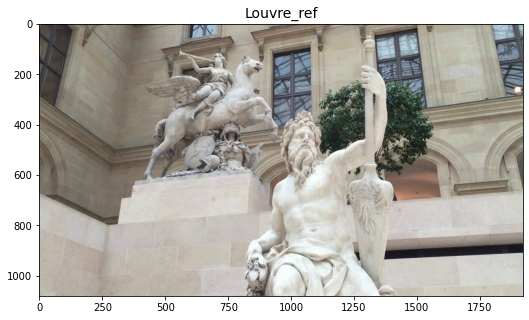

In [6]:
show_image(original_image, 'Louvre_ref')

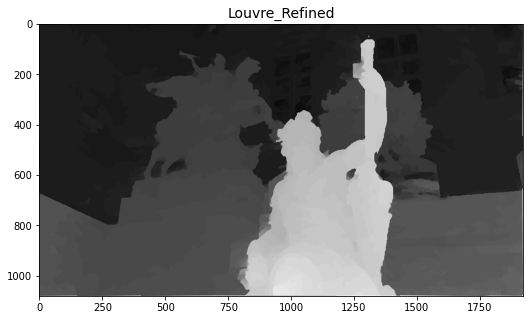

In [7]:
show_image(depth_map, 'Louvre_Refined')

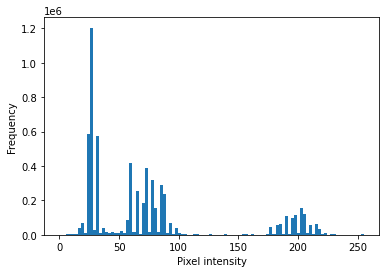

In [8]:
plt.hist(depth_map.reshape(-1), bins=100)
plt.ylabel('Frequency')
plt.xlabel('Pixel intensity')
plt.show()

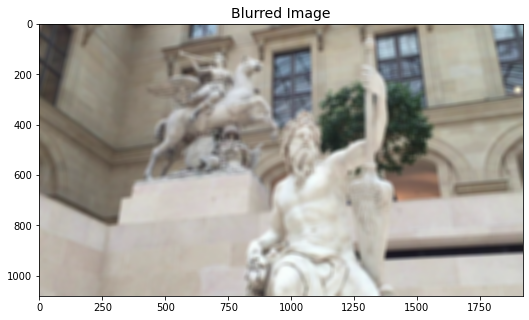

In [9]:
# blurred image

blurred_image = cv2.blur(original_image, (20, 20))

show_image(blurred_image, 'Blurred Image')

In [15]:
object_mask = depth_map > 150

print(type(object_mask))
print(object_mask.shape)
print(object_mask)

<class 'numpy.ndarray'>
(1080, 1920, 3)
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [False False False]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [False False False]
  [False False False]
  ...
  [False False False]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [False False False]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]


In [16]:
background_mask = np.invert(object_mask)

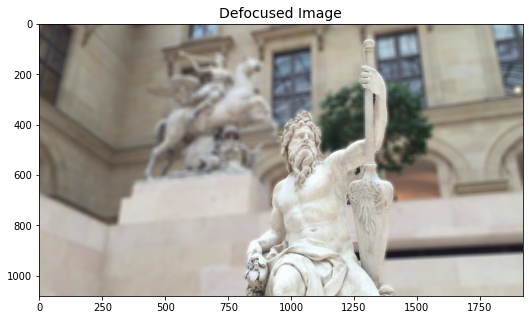

In [17]:
defocused_image = (original_image * object_mask) + (blurred_image * background_mask)

show_image(defocused_image, 'Defocused Image')

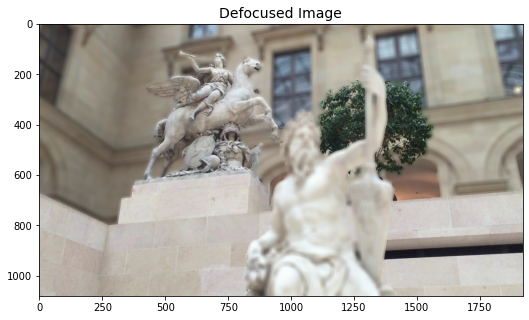

In [18]:
object_mask = (depth_map > 50) & (depth_map < 150)
background_mask = np.invert(object_mask)
defocused_image = (original_image * object_mask) + (blurred_image * background_mask)
show_image(defocused_image, 'Defocused Image')

[[[0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  ...
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]]

 [[0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.  0.  0. ]
  ...
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]]

 [[0.2 0.2 0.2]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]]

 ...

 [[0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.  0.  0. ]
  ...
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]]

 [[0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  ...
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]]

 [[0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  ...
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]
  [0.2 0.2 0.2]]]


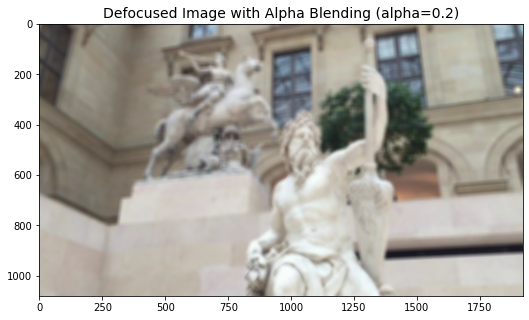

[[[0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  ...
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]]

 [[0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.  0.  0. ]
  ...
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]]

 [[0.4 0.4 0.4]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]]

 ...

 [[0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.  0.  0. ]
  ...
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]]

 [[0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  ...
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]]

 [[0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  ...
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]
  [0.4 0.4 0.4]]]


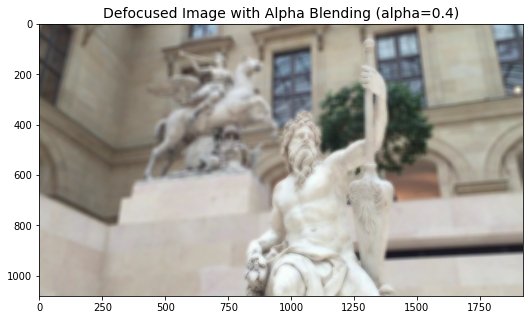

[[[0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  ...
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]]

 [[0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.  0.  0. ]
  ...
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]]

 [[0.6 0.6 0.6]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]]

 ...

 [[0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.  0.  0. ]
  ...
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]]

 [[0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  ...
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]]

 [[0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  ...
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]
  [0.6 0.6 0.6]]]


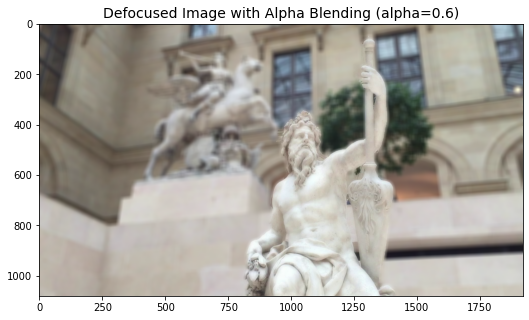

[[[0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  ...
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]]

 [[0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.  0.  0. ]
  ...
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]]

 [[0.8 0.8 0.8]
  [0.  0.  0. ]
  [0.  0.  0. ]
  ...
  [0.  0.  0. ]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]]

 ...

 [[0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.  0.  0. ]
  ...
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]]

 [[0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  ...
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]]

 [[0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  ...
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]
  [0.8 0.8 0.8]]]


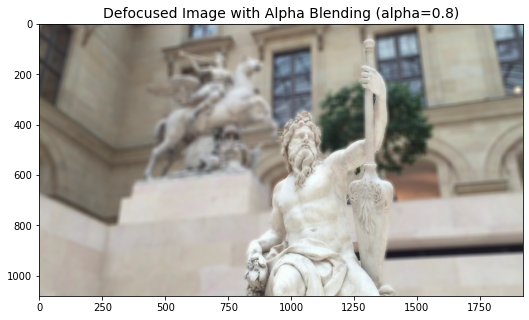

In [20]:
for alpha in [0.2, 0.4, 0.6, 0.8]:
    object_mask_w_alpha = alpha * (depth_map > 150).astype(np.float32)
    print(object_mask_w_alpha)
    background_mask_w_alpha = (1-object_mask_w_alpha)

    defocused_image_w_alpha = (original_image * object_mask_w_alpha) + (blurred_image * background_mask_w_alpha)
    defocused_image_w_alpha = defocused_image_w_alpha.astype(np.uint8)

    show_image(defocused_image_w_alpha, 'Defocused Image with Alpha Blending (alpha=%s)' % alpha)